# 1. Introduction

Welcome to your third assignment. In this assignment, you will build a deep neural network step by step. In this notebook, you will implement all the functions required to build a neural network.

After finishing this assignment, you will have a deeper understanding of the process of training a deep neural network, which only consists of three steps: forward propagation, backward propagation and update.

# 2. Packages
All the packages that you need to finish this assignment are listed below.
*   numpy : the fundamental package for scientific computing with Python.
*   matplotlib : a comprehensive library for creating static, animated, and interactive visualizations in Python.
*   math : Python has a built-in module that you can use for mathematical tasks.
*   sklearn.datasets : scikit-learn comes with a few small standard datasets that do not require to download any file from some external website. You will be using the Iris dataset to build a binary classifier.
*   pandas.read_csv : provides functionality for reading a csv dataset from a GitHub repository.

⚠️ **WARNING** ⚠️: 
*   Please do not import any other packages.
*   np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed.

💡 **Reminder** 💡: The basic part only includes binary classification. Functions like `softmax()` and `compute_CCE_loss` are counted as the bonus part, you can skip these implementations if you wish to do the basic part only 😀. If you are not sure which part belongs to the bonus part, you can refer to the code. For the bonus part, the code will look as follows: `### START CODE HERE ### (...) (bonus)`. Please set `bonus` to True in the first code cell if you want to do the bonus part.

❗ **Important** ❗: Please do not change the code outside this code bracket.
```
### START CODE HERE ### (≈ n lines of code)
...
### END CODE HERE ###
```



In [566]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import datasets
from pandas import read_csv

output = {}

"""
Set bonus to True if you want to do the bonus part
"""
### START CODE HERE ### (≈ 1 line of code) (bonus)
bonus = True
### END CODE HERE ###

In [567]:
# Helper function
def predict(X, y, parameters, classes):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    classes - number of classes, 2 for binary classification, >2 for multi-class classification
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network

    if classes == 2:
        p = np.zeros((1,m))
    else:
        p = np.zeros((classes, m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters, classes)
    
    if classes == 2:
      # convert probas to 0/1 predictions
      for i in range(0, probas.shape[1]):
            if probas[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0

      #print results
      if y is not None:
        print("Accuracy: "  + str(np.sum((p == y)/m)))

    else:
      # convert probas to one hot vector predictions
      prediction = np.argmax(probas, axis=0, out=None)
    
      for i in range(len(prediction)):
            p[prediction[i], i] = 1

      #print results
      if y is not None:
        correct = 0
        for i in range(m):
            if (p[:, i] == y[:, i]).all():
                correct += 1
        print("Accuracy: "  + str(correct/m))
        
    return p

# 3. Forward propagation module
## 3.1. Implement a linear layer
In this section, you will need to implement a linear layer. A linear layer applies a linear transformation to the incoming data:
$Z = WA + b$, where $W$ and $b$ are the weight and bias.

**Note**: Fully-connected layers, also known as linear layers, connect every input neuron to every output neuron and are commonly used in neural networks.

### 3.1.1. Initialize parameters (1-layer neural network)
**Exercise**: Create and initialize parameters of a linear layer with He initialization. (5%)

"He Initialization" is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of sqrt(1./layers_dims[l-1]) where He initialization would use sqrt(2./layers_dims[l-1]).)

**Instructions**:
*   Use random initialization (normal distribution) for the weight matrices and multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$.
*   Use zero initialization for the biases and multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$.




In [568]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_y, n_x)
                    b1 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = (np.random.normal(0, 1, size=(n_y, n_x)))*math.sqrt(2/n_x)
    b1 = np.zeros(shape=(n_y, 1))*math.sqrt(2/n_x)
            
    ### END CODE HERE ###
    
    assert(W1.shape == (n_y, n_x))
    assert(b1.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1}
    
    return parameters

In [569]:
parameters = initialize_parameters(3,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))

output["initialize_parameters"] = initialize_parameters(4, 2)

W1 = [[ 1.32627244 -0.49949702 -0.43125043]]
b1 = [[0.]]


Expected output: 
<table>
  <tr>
    <td>W1: </td>
    <td>[[ 1.32627244 -0.49949702 -0.43125043]]</td>
  </tr>
  <tr>
    <td>b1: </td>
    <td>[[0.]]</td>
  </tr>
</table>

### 3.1.2. Initialize parameters (L-layer neural network)
**Exercise**: Create and initialize parameters for an L-layer neural network with He initialization. (5%)

**Instructions**:
*   Use random initialization (normal distribution) for the weight matrices and multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$.
*   Use zero initialization for the biases and multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$.

In [570]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = (np.random.normal(0, 1, size=(layer_dims[l], layer_dims[l-1])))*math.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros(shape=(layer_dims[l], 1))*math.sqrt(2/layer_dims[l-1])
        ### END CODE HERE ###

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [571]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

output["initialize_parameters_deep"] = initialize_parameters_deep([3,4,5])

W1 = [[ 1.02732621 -0.38690873 -0.33404515 -0.67860494  0.54733184]
 [-1.45562088  1.10351585 -0.48142952  0.20177804 -0.15771567]
 [ 0.92471825 -1.30294739 -0.20391454 -0.2428973   0.71705876]
 [-0.69563232 -0.10905317 -0.55520641  0.02669832  0.36860471]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.77825528  0.8094419   0.63752091  0.35531715]
 [ 0.63700135 -0.48346861 -0.08689651 -0.66168891]
 [-0.18942548  0.37501795 -0.48907801 -0.28054711]]
b2 = [[0.]
 [0.]
 [0.]]


Expected output: 
<table>
  <tr>
    <td>W1: </td>
    <td>[[ 1.02732621 -0.38690873 -0.33404515 -0.67860494  0.54733184]
 [-1.45562088  1.10351585 -0.48142952  0.20177804 -0.15771567]
 [ 0.92471825 -1.30294739 -0.20391454 -0.2428973   0.71705876]
 [-0.69563232 -0.10905317 -0.55520641  0.02669832  0.36860471]]</td>
  </tr>
  <tr>
    <td>b1: </td>
    <td>[[0.]
 [0.]
 [0.]
 [0.]]</td>
  </tr>
  <tr>
    <td>W2: </td>
    <td>[[-0.77825528  0.8094419   0.63752091  0.35531715]
 [ 0.63700135 -0.48346861 -0.08689651 -0.66168891]
 [-0.18942548  0.37501795 -0.48907801 -0.28054711]]</td>
  </tr>
  <tr>
    <td>b2: </td>
    <td>[[0.]
 [0.]
 [0.]]</td>
  </tr>
</table>

### 3.1.3. Linear forward

After initializing parameters, you will need to apply the linear transformation to the incoming data, and this can be simply done by matrix multiplication and addition.

**Exercise**: Apply the linear transformation. (5%)

In [572]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W, A)+b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [573]:
A, W, b = np.array([[0, 0.5, 1], [1, 1.5, 2], [2, 2.5, 3]]), np.array([[0.1, 0.2, 0.3]]), np.array([[1.1]])

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

output["linear_forward"] = linear_forward(np.array([[0, -0.5, -1], [1, 1.5, 2], [-2, -2.5, -3]]), np.array([[0.5, 0.3, 0.7]]), np.array([[-1.1]]))

Z = [[1.9 2.2 2.5]]


Expected output: 
<table>
  <tr>
    <td>Z: </td>
    <td>[[1.9 2.2 2.5]]</td>
  </tr>
</table>

## 3.2. Activation function layer

In this section, you will need to implement activation function layers. There are many activation functions, such as sigmoid function, softmax function, ReLU function and etc. 

### 3.2.1. Sigmoid function
Sigmoid: $\sigma(Z) = \begin{cases}
    \frac{1}{1+e^{-Z}},& \text{if } Z >= 0\\
    \frac{e^{Z}}{1+e^{Z}}, & \text{otherwise}
\end{cases}$. 

❗**Important**❗: As you can see, there is an exponential function inside the sigmoid function, so you might encounter an exponential overflow problem when implementing this function. To solve this problem, we use the numerically stable sigmoid function as shown in the equation above.

### 3.2.2. Softmax function
Softmax: $\sigma(\vec{Z})_i = \frac{e^{Z_i-b}}{\sum_{j=1}^{K} e^{Z_j-b}}$, where $\vec{Z}$ = input vector, $K$ = number of classes in the multi-class classifier, $b$ is $\max_{j=1}^{K} Z_j$

❗**Important**❗: The naive implementation $\sigma(\vec{Z})_i = \frac{e^{Z_i}}{\sum_{j=1}^{K} e^{Z_j}}$ is terrible when there are large numbers! You might encounter the following problems if you use the naive implementation.
*   RuntimeWarning: overflow encountered in exp


### 3.2.3. ReLU (rectified linear unit) function
ReLU: $RELU(Z) = max(Z, 0)$



**Exercise**: Implement activation function. (10%+5%) (basic: Sigmoid and ReLU, bonus: Softmax)

**Instruction**: 
*   Sigmoid: This function returns two items: the activation value "a" and a cache "a" contains "z" (it's what we will feed in to the corresponding backward function).
*   Softmax: This function returns two items: the activation value "a" and a cache "a" contains "z" (it's what we will feed in to the corresponding backward function).
*   ReLU: This function returns two items: the activation value "a" and a cache "a" contains "z" (it's what we will feed in to the corresponding backward function).

In [574]:
# GRADED FUNCTION: sigmoid, softmax, relu

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    ### START CODE HERE ### (≈ 8 lines of code)
    A=[]
    for i in range(Z.shape[0]):
        temp=[]
        for j in range(Z.shape[1]):
            if Z[i,j] >= 0:
                e = math.exp(-Z[i,j])
                temp.append(1 / (1 + e))
            else:
                e = math.exp(Z[i,j])
                temp.append(e / (1 + e))
        A.append(temp)
    A=np.array(A)
    cache = Z
    ### END CODE HERE ###
    
    return A, cache

def softmax(Z):
    """
    Implements the softmax activation in numpy
    
    Arguments:
    Z -- numpy array of any shape (dim 0: number of classes, dim 1: number of samples)
    
    Returns:
    A -- output of softmax(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """

    ### START CODE HERE ### (≈ 2 lines of code) (bonus)
    A=np.exp(Z-np.max(Z,axis=0))/np.sum(np.exp(Z-np.max(Z,axis=0)),axis=0)
    cache = Z
    ### END CODE HERE ###
    
    assert(A.shape == Z.shape)
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function in numpy
    Arguments:
    Z -- numpy array of any shape
    Returns:
    A -- output of relu(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    A=np.where(Z>0, Z, 0)
    A=np.array(A)
    cache = Z
    ### END CODE HERE ###S
    
    assert(A.shape == Z.shape)
    
    return A, cache

In [575]:
Z = np.array([[-5, -1, 0, 1, 5]])

A, cache = sigmoid(Z)
print("Sigmoid: A = " + str(A))
output["sigmoid"] = sigmoid(np.array([[-1.82, -0.71, 0.02, 0.13, 2.21]]))

A, cache = relu(Z)
print("ReLU: A = " + str(A))
output["relu"] = relu(np.array([[-1.82, -0.71, 0.02, 0.13, 2.21]]))

if bonus:
    Z = np.array([[1, 0, -2], [2, 1, -1], [3, 0, 0], [4, 0, 1]])
    A, cache = softmax(Z)
    print("Softmax: A = \n" + str(A))
    output["softmax"] = softmax(np.array([[0.1, 1.2, -2.1], [2.2, 0.7, -1.3], [1.4, 0.3, 0.2], [3.9, 0.5, -1.6]]))
else:
    output["softmax"] = None

Sigmoid: A = [[0.00669285 0.26894142 0.5        0.73105858 0.99330715]]
ReLU: A = [[0 0 0 1 5]]
Softmax: A = 
[[0.0320586  0.1748777  0.0320586 ]
 [0.08714432 0.47536689 0.08714432]
 [0.23688282 0.1748777  0.23688282]
 [0.64391426 0.1748777  0.64391426]]


Expected output: 
<table>
  <tr>
    <td>(With sigmoid) A: </td>
    <td>[[0.00669285 0.26894142 0.5        0.73105858 0.99330715]]</td>
  </tr>
  <tr>
    <td>(With ReLU) A: </td>
    <td>[[0 0 0 1 5]]</td>
  </tr>
  <tr>
    <td>(With softmax) A: </td>
    <td>[[0.0320586  0.1748777  0.0320586 ]
 [0.08714432 0.47536689 0.08714432]
 [0.23688282 0.1748777  0.23688282]
 [0.64391426 0.1748777  0.64391426]]</td>
  </tr>
</table>

## 3.3. Model forward
Alright, now you have all the tools that are needed to build a forward model. Let's get started! 😀

### 3.3.1. Linear activation forward
First, you will need to combine linear and activation function layers into a linear-activation layer, following this equation: $A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]}+b^{[l]})$, where activation function $g$ could be `sigmoid()`, `softmax()` or `relu()`.

**Exercise**: Implement linear-activation layer. (5%)

**Note**: In deep learning, a linear-activation layer is counted as a single layer in the neural network, not two layers since the activation layer does not have any parameter.

In [576]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid", "relu" or "softmax"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b) # This "linear_cache" contains (A_prev, W, b)
        A, activation_cache = sigmoid(Z) # This "activation_cache" contains "Z"
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b) # This "linear_cache" contains (A_prev, W, b)
        A, activation_cache = relu(Z) # This "activation_cache" contains "Z"
        ### END CODE HERE ###

    elif activation == "softmax":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)  (bonus)
        Z, linear_cache = linear_forward(A_prev, W, b) # This "linear_cache" contains (A_prev, W, b)
        A, activation_cache = softmax(Z) # This "activation_cache" contains "Z"
        ### END CODE HERE ###

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [577]:
A_prev, W, b = np.array([[0.1, -1.2, 1.9], [1.1, 0.2, 2.3], [2.9, -2.5, 3.7]]), np.array([[0.1, 0.2, 0.3]]), np.array([[-0.5]])

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))
output["linear_activation_forward_sigmoid"] = linear_activation_forward(np.array([[1.1, -2.2], [-3.9, 0.6]]), np.array([[9.1, -8.2]]), np.array([[0.5]]), activation = "sigmoid")

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))
output["linear_activation_forward_relu"] = linear_activation_forward(np.array([[1.1, -2.2], [-3.9, 0.6]]), np.array([[9.1, -8.2]]), np.array([[0.5]]), activation = "relu")

if bonus:
    A_prev, W, b = np.array([[0.1, -1.2, 1.9], [1.1, 0.2, 2.3], [2.9, -2.5, 3.7]]), np.array([[0.1, 0.2, 0.3], [-0.1, -0.2, -0.3], [-0.1, 0, 0.1]]), np.array([[-0.5], [0.5], [0.1]])
    A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "softmax")
    print("With softmax: A = \n" + str(A))
    output["linear_activation_forward_softmax"] = linear_activation_forward(np.array([[-0.1, 1.2, 1.9], [-1.1, 0.2, -2.3], [2.9, -2.5, -3.7]]), np.array([[0.2, 0.2, 0.2], [-0.1, -0.1, -0.1], [-0.1, 0, 0.1]]), np.array([[-0.1], [0.1], [0.5]]), activation = "softmax")
else:
    output["linear_activation_forward_softmax"] = None

With sigmoid: A = [[0.64565631 0.20915937 0.77902611]]
With ReLU: A = [[0.6  0.   1.26]]
With softmax: A = 
[[0.47535001 0.05272708 0.68692136]
 [0.14317267 0.75380161 0.05526942]
 [0.38147732 0.19347131 0.25780921]]


Expected output: 
<table>
  <tr>
    <td>(With sigmoid) A: </td>
    <td>[[0.64565631 0.20915937 0.77902611]]</td>
  </tr>
  <tr>
    <td>(With ReLU) A: </td>
    <td>[[0.6  0.   1.26]]</td>
  </tr>
  <tr>
    <td>(With softmax) A: </td>
    <td>[[0.47535001 0.05272708 0.68692136]
 [0.14317267 0.75380161 0.05526942]
 [0.38147732 0.19347131 0.25780921]]</td>
  </tr>
</table>

### 3.3.2. L model forward
For even more convenience when implementing the $L$-layer Neural Net, you will need a function that replicates the previous one (linear_activation_forward with `relu()`) $L-1$ times, then follows that with one linear_activation_forward with `sigmoid()` for binary classification or `softmax()` for multi-class classification.

In the code below, the variable AL will denote $A^{[L]} = g(Z^{[L]}) = g(W^{[L]}A^{[L-1]}+b^{[L]})$, where activation function g could be `sigmoid()` for binary classification or `softmax()` for multi-class classification.

**Instruction**:
*   Use the functions you had previously written.
*   Use a for loop to replicate [LINEAR->RELU] (L-1) times.
*   Don't forget to keep track of the caches in the "caches" list. To add a new value c to a list, you can use list.append(c).

**Note**: There are N nodes in the last layer for N-class classification, but only one node for binary classification. Intuitively, this could be pretty confusing sometimes since there should be two nodes in the last layer for binary classification. However, both the one-node(sigmoid, binary cross-entropy) and two-node(softmax, categorical cross-entropy) techniques for binary classification work fine, and picking one technique over the other is a matter of subjective preference. For this assignment, you will implement the former one, which is what we usually do for binary classification.



In [578]:
def L_model_forward(X, parameters, classes):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    classes -- number of classes (2 for binary classification, >2 for multi-class classification) 
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)
    
    if classes == 2:
      # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
        AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
        caches.append(cache)
        assert(AL.shape == (1,X.shape[1]))
    else:
      # Implement LINEAR -> SOFTMAX. Add "cache" to the "caches" list.
        AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "softmax")
        caches.append(cache)
        assert(AL.shape == (classes,X.shape[1]))
            
    return AL, caches

In [579]:
# binary classification
X, parameters, classes = np.array([[0, 1, 2], [-2, -1, 0], [0.5, 0.5, 0.5]]), initialize_parameters_deep([3,3,1]), 2
AL, caches = L_model_forward(X, parameters, classes)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

# multi-class classification
if bonus:
    X, parameters, classes = np.array([[0, 1, 2], [-2, -1, 0], [0.5, 0.5, 0.5]]), initialize_parameters_deep([3,3,10]), 10
    AL, caches = L_model_forward(X, parameters, classes)
    print("AL = " + str(AL))
    print("Length of caches list = " + str(len(caches)))

AL = [[0.07802314 0.01818575 0.00403778]]
Length of caches list = 2
AL = [[6.18255541e-03 7.61028230e-04 7.66374121e-05]
 [2.11940510e-01 2.01651685e-01 1.56962913e-01]
 [1.35096366e-02 2.03338206e-03 2.50381145e-04]
 [2.18485590e-02 6.14321609e-03 1.41311042e-03]
 [2.66899863e-01 4.51947825e-01 6.26088267e-01]
 [1.13256434e-01 1.07946425e-01 8.41707040e-02]
 [7.27765014e-02 3.08118586e-02 1.06721503e-02]
 [2.17220658e-02 4.88048793e-03 8.97083101e-04]
 [4.19482610e-02 1.32235761e-02 3.41028905e-03]
 [2.29915615e-01 1.80600516e-01 1.16058465e-01]]
Length of caches list = 2


Expected output: 
<table>
  <tr>
    <td>(Binary classification) AL: </td>
    <td>[[0.07802314 0.01818575 0.00403778]]</td>
  </tr>
  <tr>
    <td>(Binary classification) Length of caches list: </td>
    <td>2</td>
  </tr>
  <tr>
    <td>(Multi-class classification) AL: </td>
    <td>[[6.18255541e-03 7.61028230e-04 7.66374121e-05]
 [2.11940510e-01 2.01651685e-01 1.56962913e-01]
 [1.35096366e-02 2.03338206e-03 2.50381145e-04]
 [2.18485590e-02 6.14321609e-03 1.41311042e-03]
 [2.66899863e-01 4.51947825e-01 6.26088267e-01]
 [1.13256434e-01 1.07946425e-01 8.41707040e-02]
 [7.27765014e-02 3.08118586e-02 1.06721503e-02]
 [2.17220658e-02 4.88048793e-03 8.97083101e-04]
 [4.19482610e-02 1.32235761e-02 3.41028905e-03]
 [2.29915615e-01 1.80600516e-01 1.16058465e-01]]</td>
  </tr>
  <tr>
    <td>(Multi-class classification) Length of caches list: </td>
    <td>2</td>
  </tr>
</table>

# 4. Cost function
In this section, you will implement the cost function. We use binary cross-entropy loss for binary classification and categorical cross-entropy loss for multi-class classification. You need to compute the cost, because you want to check if your model is actually learning. Cross-entropy loss is minimized, where smaller values represent a better model than larger values. A model that predicts perfect probabilities has a cross entropy or log loss of 0.0.

## 4.1. Binary cross-entropy loss
**Exercise**: Compute the binary cross-entropy cost $J$, using the following formula: (5%) $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$

In [580]:
# GRADED FUNCTION: compute_BCE_cost

def compute_BCE_cost(AL, Y):
    """
    I   oss-entropy cost function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- binary cross-entropy cost
    """
    
    m = Y.shape[1]
    s=0

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    for i in range(m):
        s+=Y[0][i]*np.log(AL[0][i])+(1-Y[0][i])*np.log(1-AL[0][i])
    cost = (-1/m)*s
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    cost=np.array(cost)
    return cost

In [581]:
AL, Y = np.array([[0.9, 0.6, 0.4, 0.1, 0.2, 0.8]]), np.array([[1, 1, 1, 0, 0, 0]])
print("cost = " + str(compute_BCE_cost(AL, Y)))
output["compute_BCE_cost"] = compute_BCE_cost(np.array([[0.791, 0.983, 0.654, 0.102, 0.212, 0.091, 0.476, 0.899]]), np.array([[1, 1, 1, 1, 0, 0, 0, 0]]))

cost = 0.5784031417840181


Expected output: 
<table>
  <tr>
    <td>cost: </td>
    <td>0.5784031417840181</td>
  </tr>
</table>

## 4.2. Categorical cross-entropy loss
**Exercise**: Compute the categorical cross-entropy cost $J$, using the following formula: (5%) $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right))$$

In [582]:
# GRADED FUNCTION: compute_CCE_cost

def compute_CCE_cost(AL, Y):
    """
    Implement the categorical cross-entropy cost function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (number of classes, number of examples)
    Y -- true "label" vector (one hot vector, for example: [[1], [0], [0]] represents rock, [[0], [1], [0]] represents paper, [[0], [0], [1]] represents scissors 
                              in a Rock-Paper-Scissors image classification), shape (number of classes, number of examples)

    Returns:
    cost -- categorical cross-entropy cost
    """
    
    m = Y.shape[1]
    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code) (bonus)
    cost = (-1/m)*np.sum(Y*np.log(AL))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    cost=np.array(cost)
    return cost

In [583]:
if bonus:
    AL, Y = np.array([[0.8, 0.6, 0.4, 0.1, 0.2, 0.4], [0.1, 0.3, 0.5, 0.7, 0.1, 0.1], [0.1, 0.1, 0.1, 0.2, 0.7, 0.5]]), np.array([[1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1]])
    print("cost = " + str(compute_CCE_cost(AL, Y)))
    output["compute_CCE_cost"] = compute_CCE_cost(np.array([[0.711, 0.001, 0.11], [0.099, 0.217, 0.09], [0.035, 0.599, 0.12], [0.068, 0.123, 0.1], [0.087, 0.06, 0.58]]), np.array([[1, 0, 0], [0, 0, 0], [0, 1, 0], [0, 0, 0], [0, 0, 1]]))
else:
    output["compute_CCE_cost"] = None

cost = 0.472268904012926


Expected output: 
<table>
  <tr>
    <td>cost: </td>
    <td>0.472268904012926</td>
  </tr>
</table>

# 5. Backward propagation module
In this section, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters.

A quick revision for backpropapagation:

<img src="https://raw.githubusercontent.com/amanchadha/coursera-deep-learning-specialization/6ebc4d60a90c1592aee3eaa3113eb4b37d9b4b19/C1%20-%20Neural%20Networks%20and%20Deep%20Learning/Week%204/Building%20your%20Deep%20Neural%20Network%20-%20Step%20by%20Step/images/backprop_kiank.png" height="200"/>

Similar to forward propagation, you are going to build the backward propagation in three steps:
*   LINEAR backward
*   LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU, sigmoid or softmax activation
*   [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID/SOFTMAX backward (whole model)

## 5.1. Linear backward
For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.Here are the formulas you need:$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)} $$$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$

**Exercise**: Use the 3 formulas above to implement `linear_backward()`. (5%)









In [584]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    # Here cache is "linear_cache" containing (A_prev, W, b) coming from the forward propagation in the current layer
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    db=np.array([])
#     print(dZ.shape)?
    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1)
    db=(np.stack([db])).T
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [585]:
# Set up some test inputs
dZ, linear_cache = np.array([[1.5, 2.5], [0.5, 1.0]]), (np.array([[0.5, 1]]), np.array([[2.0], [1.0]]), np.array([[0.5], [1.0]]))

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = " + str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

output["linear_backward"] = linear_backward(np.array([[0.5, -1.5], [-1.5, 2.0]]), (np.array([[0.25, 1.25]]), np.array([[-1.0], [1.0]]), np.array([[-0.5], [-1.0]])))

dA_prev = [[3.5 6. ]]
dW = [[1.625]
 [0.625]]
db = [[2.  ]
 [0.75]]


Expected output: 
<table>
  <tr>
    <td>dA_prev: </td>
    <td>[[3.5 6. ]]</td>
  </tr>
  <tr>
    <td>dW: </td>
    <td>[[1.625]
 [0.625]]</td>
  </tr>
  <tr>
    <td>db: </td>
    <td>[[2.  ]
 [0.75]]</td>
  </tr>
</table>

## 5.2. Linear-Activation backward
Next, you will create a function that merges the two helper functions: `linear_backward()` and the backward step for the activation `linear_activation_backward()`.

First, you will need to implement the backward functions of `sigmoid()`, `relu()` and `softmax()`+`compute_CCE_cost`.

**Exercise**: Implement backward function. (10%+5%) (basic: Sigmoid and ReLU, bonus: Softmax+CCE_loss)

**Instruction**:
*   sigmoid_backward: Implements the backward propagation for SIGMOID unit.
*   relu_backward: Implements the backward propagation for RELU unit.
*   softmax_CCE_backward: Implements the backward propagation for [SOFTMAX->LOSS] unit.

If $g(.)$ is the activation function, sigmoid_backward, relu_backward and softmax_backward compute$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$

1. The derivative of the sigmoid function is: $$σ^{'}(Z^{[l]}) = σ(Z^{[l]}) (1 - σ(Z^{[l]}))$$. <br>
❗**Important**❗: You should use the numerically stable sigmoid function to prevent the overflow exponential problem. 

2. The derivative of the relu function is: $$g'(Z^{[l]}) = \begin{cases}
    1,& \text{if } Z^{[l]}> 0\\
    0,              & \text{otherwise}
\end{cases}$$

3. TLDR😉: The derivative of the categorical cross-entropy loss with respect to the last hidden layer is: $$\frac{\partial \mathcal{L}}{\partial Z} = s - y $$. <br> The derivative of the softmax function is: $$\frac{\partial S(z_i)}{\partial z_j} = \begin{cases}
    S(z_i) \times (1 - S(z_i)),& \text{if } i = j\\
    -S(z_i) \times S(z_j),              & \text{if } i \neq j
\end{cases}$$, where $z$ is a vector with shape (number of classes K, 1) and $S(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$. Hence, the real derivative of softmax function would be a full Jacobian matrix. For the special case, K = 4, we have <img src="https://miro.medium.com/max/554/1*SWfgFQLDIPXDf1C6CHmr8A.png" height="100"/>. <br> It is quite complicated to calculate the softmax derivative on its own. However, if you use the softmax and the cross entropy loss, that complexity fades away. Since the softmax layer is usually used at the output, we can actually calculate the derivative of the categorical cross-entropy loss with respect to the n-th node in the last hidden layer. Instead of a long clunky formula, you end up with this terse, easy to compute thing: $$\frac{\partial \mathcal{L}}{\partial Z_i} = s_i - y_i $$, where $s$ is the output of the softmax function and the $y$ is the true label vector(one-hot vector). For more information, you can refer to this article [Derivative of the Softmax Function and the Categorical Cross-Entropy Loss](https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1). <br> 
❗**Important**❗: The above mathematical derivation is based on naive implementation. In order to deal with the exponential overflow problem, we should use the normalized exponential function when counting $s$. For the sake of simplicity, we just use the same gradient equation as the naive implementation.






In [586]:
# GRADED FUNCTION: sigmoid_backward, relu_backward, softmax_CCE_backward

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    ### START CODE HERE ### (≈ 9 lines of code)
    Z = cache.copy()
    sigmoid_Z=sigmoid(Z)[0]
    dZ=sigmoid_Z
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            dZ[i][j]=sigmoid_Z[i][j]*(1-sigmoid_Z[i][j])
    dZ=dZ*dA
    ### END CODE HERE ###
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    ### START CODE HERE ### (≈ 3 lines of code)
    Z = cache
    dZ = dA.copy()
    dZ[Z <= 0] = 0 # When z <= 0, you should set dz to 0 as well.
    ### END CODE HERE ###
    assert (dZ.shape == Z.shape)
    
    return dZ

def softmax_CCE_backward(Y, cache):
    """
    Implement the backward propagation for a [SOFTMAX->LOSS] unit.
    Arguments:
    Y -- true "label" vector (one hot vector, for example: [[1], [0], [0]] represents rock, [[0], [1], [0]] represents paper, [[0], [0], [1]] represents scissors 
                              in a Rock-Paper-Scissors image classification), shape (number of classes, number of examples)
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    ### START CODE HERE ### (≈ 3 lines of code) (bonus)
    Z = cache.copy()
    s = softmax(Z)[0]
    dZ = s-Y
    ### END CODE HERE ###
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [587]:
dA, cache = np.array([[-2, -1.37, -1.14, -2, -3.72]]), np.array([[0, 1, 2, 0, 1]])
dZ = sigmoid_backward(dA, cache)
print("Sigmoid: dZ = "+ str(dZ))
output["sigmoid_backward"] = sigmoid_backward(np.array([[-2, -2, -1.37, -1.14, -3.72]]), np.array([[2, 0, 1.5, 0, 0.5]]))

dA, cache = np.array([[-2, -1.37, -1.14], [1.7, 2, 3.72]]), np.array([[-2, -1, 2], [1, 0, 1]])
dZ = relu_backward(dA, cache)
print("ReLU: dZ = "+ str(dZ))
output["relu_backward"] = relu_backward(np.array([[3.179, -1.376, -0.114], [2.227, -5.612, 4.172]]), np.array([[0.53, 1.21, -2.22], [-1.58, 0.99, -0.11]]))

if bonus:
    Y, cache = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]), np.array([[-2, -1, -2], [1, 0, -2], [0, 1, 2]])
    dZ = softmax_CCE_backward(Y, cache)
    print("Softmax: dZ = " + str(dZ))
    output["softmax_CCE_backward"] = softmax_CCE_backward(np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]), np.array([[-2.11, -1.22, -2.33], [1.44, 0.55, -2.66], [0.77, 1.88, 2.99]]))
else:
    output["softmax_CCE_backward"] = None

Sigmoid: dZ = [[-0.5        -0.26935835 -0.11969269 -0.5        -0.73139639]]
ReLU: dZ = [[ 0.    0.   -1.14]
 [ 1.7   0.    3.72]]
Softmax: dZ = [[-0.96488097  0.09003057  0.01766842]
 [ 0.70538451 -0.75527153  0.01766842]
 [ 0.25949646  0.66524096 -0.03533684]]


Expected output: 
<table>
  <tr>
    <td>(With sigmoid) A: </td>
    <td>[[-0.5        -0.26935835 -0.11969269 -0.5        -0.73139639]]</td>
  </tr>
  <tr>
    <td>(With ReLU) A: </td>
    <td>[[ 0.    0.   -1.14]
 [ 1.7   0.    3.72]]</td>
  </tr>
  <tr>
    <td>(With softmax) A: </td>
    <td>[[-0.96488097  0.09003057  0.01766842]
 [ 0.70538451 -0.75527153  0.01766842]
 [ 0.25949646  0.66524096 -0.03533684]]</td>
  </tr>
</table>

**Exercise**: Implement the backpropagation for the LINEAR->ACTIVATION layer. (5%)

**Instruction**:
*   Use the functions you had previously written.

In [588]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    
    linear_cache, activation_cache = cache
    if activation == "relu":
        ### START CODE HERE ### (≈ 1 line of code)
        
        dZ = relu_backward(dA, activation_cache)

        ### END CODE HERE ###
        
    elif activation == "sigmoid":

        ### START CODE HERE ### (≈ 1 line of code)
        dZ = sigmoid_backward(dA, activation_cache)
        ### END CODE HERE ###
    
    ### START CODE HERE ### (≈ 1 line of code)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    ### END CODE HERE ###
    
    return dA_prev, dW, db

In [589]:
dAL, linear_activation_cache  = np.array([[-2, -1.37, -1.14, -2, -3.72]]), ((np.array([[-2, -1, 0, 1, 2], [2, 1, 0, -1, -2]]), np.array([[2.0, 1.0]]), np.array([[0.5]])), np.array([[0, 1, 2, 0, 1]]))
dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache , activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")
output["linear_activation_backward_sigmoid"] = linear_activation_backward(dAL+1, linear_activation_cache , activation = "sigmoid")

dAL, linear_activation_cache  = np.array([[-2, -1.37, -1.14], [1.7, 2, 3.72]]), ((np.array([[-2, -1, 0], [2, 1, 0], [0, 1, 2]]), np.array([[-2, -1, 0], [2, 1, 0]]), np.array([[0.5], [-0.5]])), np.array([[-2, -1, 2], [1, 0, 1]]))
dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache , activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))
output["linear_activation_backward_relu"] = linear_activation_backward(dAL+0.5, linear_activation_cache , activation = "relu")

sigmoid:
dA_prev = [[-1.         -0.5387167  -0.23938537 -1.         -1.46279278]
 [-0.5        -0.26935835 -0.11969269 -0.5        -0.73139639]]
dW = [[-0.13868689  0.13868689]]
db = [[-0.42408949]]

relu:
dA_prev = [[3.4  0.   9.72]
 [1.7  0.   4.86]
 [0.   0.   0.  ]]
dW = [[ 0.          0.         -0.76      ]
 [-1.13333333  1.13333333  2.48      ]]
db = [[-0.38      ]
 [ 1.80666667]]


Expected output: 
<table>
  <tr>
    <td>Sigmoid </td>
  </tr>
  <tr>
    <td>dA_prev: </td>
    <td>[[-1.         -0.5387167  -0.23938537 -1.         -1.46279278]
 [-0.5        -0.26935835 -0.11969269 -0.5        -0.73139639]]</td>
  </tr>
  <tr>
    <td>dW: </td>
    <td>[[-0.13868689  0.13868689]]</td>
  </tr>
  <tr>
    <td>db: </td>
    <td>[[-0.42408949]]</td>
  </tr>
  <tr>
    <td>ReLU </td>
  </tr>
  <tr>
    <td>dA_prev: </td>
    <td>[[3.4  0.   9.72]
 [1.7  0.   4.86]
 [0.   0.   0.  ]]</td>
  </tr>
  <tr>
    <td>dW: </td>
    <td>[[ 0.          0.         -0.76      ]
 [-1.13333333  1.13333333  2.48      ]]</td>
  </tr>
  <tr>
    <td>db: </td>
    <td>[[-0.38      ]
 [ 1.80666667]]</td>
  </tr>
</table>

##5.3 - L-Model Backward
Now you will implement the backward function for the whole network. Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$. Figure below shows the backward pass.

<img src="https://raw.githubusercontent.com/amanchadha/coursera-deep-learning-specialization/6ebc4d60a90c1592aee3eaa3113eb4b37d9b4b19/C1%20-%20Neural%20Networks%20and%20Deep%20Learning/Week%204/Building%20your%20Deep%20Neural%20Network%20-%20Step%20by%20Step/images/mn_backward.png" height="400"/>

Initializing backpropagation: To backpropagate through this network, we know that the output is, $A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute dAL $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$. To do so, use this formula (derived using calculus which you don't need in-depth knowledge of):
```
dAL = - (np.divide(Y, AL + ϵ) - np.divide(1 - Y, 1 - AL + ϵ)) # derivative of cost with respect to AL, where ϵ = 1e-5 is added to prevent zero division.
```


You can then use this post-activation gradient dAL to keep going backward. As seen in figure above, you can now feed in dAL into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function). After that, you will have to use a for loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula :

$$grads["dW" + str(l)] = dW^{[l]} $$
For example, for $l=3$ this would store $dW^{[l]}$ in grads["dW3"].


In [590]:
def L_model_backward(AL, Y, caches, classes):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    classes -- number of classes (2 for binary classification, >2 for multi-class classification)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    if classes == 2:
        # Initializing the backpropagation
        dAL = - (np.divide(Y, AL + 1e-5) - np.divide(1 - Y, 1 - AL + 1e-5))

        # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
        current_cache = caches[L-1] # Last Layer
        grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    else:
        # Initializing the backpropagation
        linear_cache, activation_cache = caches[L-1] # Last Layer
        dZ = softmax_CCE_backward(Y, activation_cache)

        # Lth layer (LINEAR) gradients. Inputs: "dZ, linear_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
        grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_backward(dZ, linear_cache)

    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [591]:
# binary classification
X, parameters, classes = np.array([[0, 1, 2], [-2, -1, 0], [0.5, 0.5, 0.5]]), initialize_parameters_deep([3,3,1]), 2
AL, caches = L_model_forward(X, parameters, classes)
Y_assess = np.array([[1, 0, 0]])
grads = L_model_backward(AL, Y_assess, caches, classes)
print("Binary classification")
print("dW1 = "+ str(grads["dW1"]))
print("db1 = "+ str(grads["db1"]))
print("dA1 = "+ str(grads["dA1"]) +"\n")

# multi-class classification
if bonus:
    X, parameters, classes = np.array([[0, 1, 2], [-2, -1, 0], [0.5, 0.5, 0.5]]), initialize_parameters_deep([3,3,3]), 3
    AL, caches = L_model_forward(X, parameters, classes)
    Y_assess = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    grads = L_model_backward(AL, Y_assess, caches, classes)
    print("Multi-class classification")
    print("dW1 = "+ str(grads["dW1"]))
    print("db1 = "+ str(grads["db1"]))
    print("dA1 = "+ str(grads["dA1"]))

Binary classification
dW1 = [[-0.00178234 -0.12389888  0.03052914]
 [ 0.          0.          0.        ]
 [-0.01472455 -1.0235744   0.25221246]]
db1 = [[0.06105827]
 [0.        ]
 [0.50442493]]
dA1 = [[ 1.87699706e-01 -3.70276293e-03 -8.22125021e-04]
 [-1.10052058e+00  2.17100329e-02  4.82028195e-03]
 [ 1.55065655e+00 -3.05898912e-02 -6.79187823e-03]]

Multi-class classification
dW1 = [[ 0.42051843  0.06541362  0.0887762 ]
 [ 0.          0.          0.        ]
 [ 1.08372031 -1.61959581  0.67582903]]
db1 = [[0.1775524 ]
 [0.        ]
 [1.35165806]]
dA1 = [[-0.09507462 -0.00609164  0.63382346]
 [-1.45707343  0.00732963 -0.17178251]
 [ 2.4424153  -0.02604318  1.63860206]]


Expected output: 
<table>
  <tr>
    <td>Binary classification </td>
  </tr>
  <tr>
    <td>dW1: </td>
    <td>[[-0.00178234 -0.12389888  0.03052914]
 [ 0.          0.          0.        ]
 [-0.01472455 -1.0235744   0.25221246]]</td>
  </tr>
  <tr>
    <td>db1: </td>
    <td>[[0.06105827]
 [0.        ]
 [0.50442493]]</td>
  </tr>
  <tr>
    <td>dA1: </td>
    <td>[[ 1.87699706e-01 -3.70276293e-03 -8.22125021e-04]
 [-1.10052058e+00  2.17100329e-02  4.82028195e-03]
 [ 1.55065655e+00 -3.05898912e-02 -6.79187823e-03]]</td>
  </tr>
  <tr>
    <td>Multi-class classification </td>
  </tr>
  <tr>
    <td>dW1: </td>
    <td>[[ 0.42051843  0.06541362  0.0887762 ]
 [ 0.          0.          0.        ]
 [ 1.08372031 -1.61959581  0.67582903]]</td>
  </tr>
  <tr>
    <td>db1: </td>
    <td>[[0.1775524 ]
 [0.        ]
 [1.35165806]]</td>
  </tr>
  <tr>
    <td>dA1: </td>
    <td>[[-0.09507462 -0.00609164  0.63382346]
 [-1.45707343  0.00732963 -0.17178251]
 [ 2.4424153  -0.02604318  1.63860206]]</td>
  </tr>
</table>

# 6. Update parameters
In this section you will update the parameters of the model, using gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$
where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary.

**Exercise**: Implement update_parameters() to update your parameters using gradient descent. (5%)

**Instructions**: 
*   Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$.


In [592]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l+1)]
    ### END CODE HERE ###
    return parameters

In [593]:
np.random.seed(1)
parameters, grads = {"W1": np.random.rand(3, 4), "b1": np.random.rand(3,1), "W2": np.random.rand(1,3), "b2": np.random.rand(1,1)}, {"dW1": np.random.rand(3, 4), "db1": np.random.rand(3,1), "dW2": np.random.rand(1,3), "db2": np.random.rand(1,1)}
parameters = update_parameters(parameters, grads, 0.1)
print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

np.random.seed(1)
output["update_parameters"] = update_parameters({"W1": np.random.randn(3, 4), "b1": np.random.randn(3,1), "W2": np.random.randn(1,3), "b2": np.random.randn(1,1)}, {"dW1": np.random.randn(3, 4), "db1": np.random.randn(3,1), "dW2": np.random.randn(1,3), "db2": np.random.randn(1,1)}, 0.075)

W1 = [[ 0.39721186  0.64025004 -0.09671178  0.27099015]
 [ 0.07752363  0.00469968  0.09679955  0.33705631]
 [ 0.392862    0.52183369  0.33138026  0.67538482]]
b1 = [[ 0.16234149]
 [ 0.78232848]
 [-0.02592894]]
W2 = [[0.6012798  0.38575324 0.49003974]]
b2 = [[0.05692437]]


Expected output: 
<table>
  <tr>
    <td>W1: </td>
    <td>[[ 0.39721186  0.64025004 -0.09671178  0.27099015]
 [ 0.07752363  0.00469968  0.09679955  0.33705631]
 [ 0.392862    0.52183369  0.33138026  0.67538482]]</td>
  </tr>
  <tr>
    <td>b1: </td>
    <td>[[ 0.16234149]
 [ 0.78232848]
 [-0.02592894]]</td>
  </tr>
  <tr>
    <td>W2: </td>
    <td>[[0.6012798  0.38575324 0.49003974]]</td>
  </tr>
  <tr>
    <td>b2: </td>
    <td>[[0.05692437]]</td>
  </tr>
</table>

# Basic implementation (binary classification)

Congratulations on implementing all the functions by yourself. You have done an incredible job! 👏

Now you have all the tools you need to get started with classification. In this section, you will build a binary classifier using the functions you had previously written. You will create a model that can classify the different species of the Iris flower. The Iris dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. However, you only need to classify Iris setosa and Iris versicolor in this exercise.

**Exercise**: Implement a binary classifier and tune hyperparameter. (10%)

**Instruction**:
*   Train a model with validation accuracy higher than 80%.



In [594]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, classes=2):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID. (binary)
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SOFTMAX. (multi-class)
    
    Arguments:
    X -- data, numpy array of shape (4, number of examples)
    Y -- true "label" vector (containing 0 if setosa, 1 if versicolor), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    classes -- number of classes, 2 for binary classification, >2 for multi-class classification
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID/SOFTMAX.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters, classes)
        ### END CODE HERE ###
        
        # Compute cost.
        if classes == 2:
          ### START CODE HERE ### (≈ 1 line of code)
          cost = compute_BCE_cost(AL,Y)
          ### END CODE HERE ###
        else:
          ### START CODE HERE ### (≈ 1 line of code) (bonus)
          cost = compute_CCE_cost(AL, Y)
          ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches, classes)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [595]:
# load Iris dataset
iris = datasets.load_iris()
X = iris.data[:100].T
y = np.expand_dims(iris.target[:100], axis=1).T

print("shape of X: " + str(X.shape))
print("shape of y: " + str(y.shape))

# split training set and validation set
X_train, y_train = np.concatenate((X[:, :45], X[:, 50:95]), axis=1), np.concatenate((y[:, :45], y[:, 50:95]), axis=1)
X_val, y_val = np.concatenate((X[:, 45:50], X[:, 95:]), axis=1), np.concatenate((y[:, 45:50], y[:, 95:]), axis=1)

print("shape of X_train: " + str(X_train.shape) + " shape of y_train: " + str(y_train.shape))
print("shape of X_val: " + str(X_val.shape) + " shape of y_val: " + str(y_val.shape))

shape of X: (4, 100)
shape of y: (1, 100)
shape of X_train: (4, 90) shape of y_train: (1, 90)
shape of X_val: (4, 10) shape of y_val: (1, 10)


Cost after iteration 0: 1.808758
Cost after iteration 100: 0.646826
Cost after iteration 200: 0.423764
Cost after iteration 300: 0.304835
Cost after iteration 400: 0.234744
Cost after iteration 500: 0.189654
Cost after iteration 600: 0.158602
Cost after iteration 700: 0.136072
Cost after iteration 800: 0.119049
Cost after iteration 900: 0.105767
Cost after iteration 1000: 0.095133
Cost after iteration 1100: 0.086437
Cost after iteration 1200: 0.079198
Cost after iteration 1300: 0.073081
Cost after iteration 1400: 0.067847
Cost after iteration 1500: 0.063319
Cost after iteration 1600: 0.059362
Cost after iteration 1700: 0.055877
Cost after iteration 1800: 0.052783
Cost after iteration 1900: 0.050019
Cost after iteration 2000: 0.047534
Cost after iteration 2100: 0.045289
Cost after iteration 2200: 0.043250
Cost after iteration 2300: 0.041390
Cost after iteration 2400: 0.039686
Cost after iteration 2500: 0.038120
Cost after iteration 2600: 0.036676
Cost after iteration 2700: 0.035339
Cost

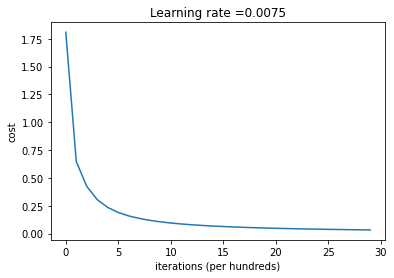

In [596]:
# GRADED CODE: hyperparameter tuning
# suggestion: 1-2 layers, layer node < 100, learning rate < 0.01
### START CODE HERE ### (≈ 2 lines of code)
layers_dims = [4,1] # e.g. [4, 1]
parameters = L_layer_model(X_train, y_train, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = True, classes=2)
### END CODE HERE ###

In [597]:
pred_train = predict(X_train, y_train, parameters, 2)

Accuracy: 1.0


In [598]:
pred_val = predict(X_val, y_val, parameters, 2)
output["basic_pred_val"] = pred_val

Accuracy: 1.0


Expected output: 
<table>
  <tr>
    <td>Accuracy: </td>
    <td>>= 0.8</td>
  </tr>
</table>

# Bonus implementation (multi class classification)

In this section, you need to implement a multi-class classifier using the functions you had previously written. You will create a model that can classify four hand gestures using electromyography (EMG) signals. The EMG signal is a biomedical signal that measures electrical currents generated in muscles during its contraction representing neuromuscular activities.

**Exercise**: Implement a multi-class classifier and tune hyperparameter. (10%)

In [619]:
# load data
X_train = read_csv("https://raw.githubusercontent.com/ivanlim123/Assignment-3-Backpropagation/main/X_train.csv", header=None).to_numpy()
y_train = read_csv("https://raw.githubusercontent.com/ivanlim123/Assignment-3-Backpropagation/main/y_train.csv", header=None).to_numpy()
X_test = read_csv("https://raw.githubusercontent.com/ivanlim123/Assignment-3-Backpropagation/main/X_test.csv", header=None).to_numpy()

print("shape of X_train: " + str(X_train.shape))
print("shape of y_train: " + str(y_train.shape))
print("shape of X_test: " + str(X_test.shape))

shape of X_train: (64, 9342)
shape of y_train: (4, 9342)
shape of X_test: (64, 2336)


In [620]:
#You can split training and validation set here. (Optional)
if bonus:
### START CODE HERE ###
    X_bonus_train, y_bonus_train = X_train[:, :7000], y_train[:, :7000]
    X_bonus_val, y_bonus_val = X_train[:, 7000:9342], y_train[:, 7000:9342]
    print("shape of X_bonus_train: " + str(X_bonus_train.shape) + " shape of y_bonus_train: " + str(y_bonus_train.shape))
    print("shape of X_bonus_val: " + str(X_bonus_val.shape) + " shape of y_bonus_val: " + str(y_bonus_val.shape))
### END CODE HERE ###

shape of X_bonus_train: (64, 7000) shape of y_bonus_train: (4, 7000)
shape of X_bonus_val: (64, 2342) shape of y_bonus_val: (4, 2342)


Cost after iteration 0: 2.019325
Cost after iteration 100: 1.405325
Cost after iteration 200: 1.377967
Cost after iteration 300: 1.364238
Cost after iteration 400: 1.352410
Cost after iteration 500: 1.340609
Cost after iteration 600: 1.328382
Cost after iteration 700: 1.315389
Cost after iteration 800: 1.301290
Cost after iteration 900: 1.285567
Cost after iteration 1000: 1.268563
Cost after iteration 1100: 1.250972
Cost after iteration 1200: 1.232508
Cost after iteration 1300: 1.213417
Cost after iteration 1400: 1.193587
Cost after iteration 1500: 1.173442
Cost after iteration 1600: 1.153148
Cost after iteration 1700: 1.132757
Cost after iteration 1800: 1.112046
Cost after iteration 1900: 1.090977
Cost after iteration 2000: 1.070013
Cost after iteration 2100: 1.049368
Cost after iteration 2200: 1.029046
Cost after iteration 2300: 1.009032
Cost after iteration 2400: 0.989441
Cost after iteration 2500: 0.970148
Cost after iteration 2600: 0.951200
Cost after iteration 2700: 0.932485
Cost

Cost after iteration 22500: 0.018588
Cost after iteration 22600: 0.018325
Cost after iteration 22700: 0.018067
Cost after iteration 22800: 0.017815
Cost after iteration 22900: 0.017567
Cost after iteration 23000: 0.017325
Cost after iteration 23100: 0.017089
Cost after iteration 23200: 0.016857
Cost after iteration 23300: 0.016631
Cost after iteration 23400: 0.016408
Cost after iteration 23500: 0.016191
Cost after iteration 23600: 0.015977
Cost after iteration 23700: 0.015768
Cost after iteration 23800: 0.015562
Cost after iteration 23900: 0.015361
Cost after iteration 24000: 0.015163
Cost after iteration 24100: 0.014969
Cost after iteration 24200: 0.014778
Cost after iteration 24300: 0.014592
Cost after iteration 24400: 0.014409
Cost after iteration 24500: 0.014230
Cost after iteration 24600: 0.014054
Cost after iteration 24700: 0.013882
Cost after iteration 24800: 0.013713
Cost after iteration 24900: 0.013546
Cost after iteration 25000: 0.013382
Cost after iteration 25100: 0.013221
C

Cost after iteration 44700: 0.002769
Cost after iteration 44800: 0.002754
Cost after iteration 44900: 0.002740
Cost after iteration 45000: 0.002727
Cost after iteration 45100: 0.002713
Cost after iteration 45200: 0.002699
Cost after iteration 45300: 0.002686
Cost after iteration 45400: 0.002672
Cost after iteration 45500: 0.002659
Cost after iteration 45600: 0.002646
Cost after iteration 45700: 0.002633
Cost after iteration 45800: 0.002620
Cost after iteration 45900: 0.002607
Cost after iteration 46000: 0.002595
Cost after iteration 46100: 0.002582
Cost after iteration 46200: 0.002569
Cost after iteration 46300: 0.002557
Cost after iteration 46400: 0.002545
Cost after iteration 46500: 0.002532
Cost after iteration 46600: 0.002520
Cost after iteration 46700: 0.002508
Cost after iteration 46800: 0.002496
Cost after iteration 46900: 0.002484
Cost after iteration 47000: 0.002473
Cost after iteration 47100: 0.002461
Cost after iteration 47200: 0.002449
Cost after iteration 47300: 0.002438
C

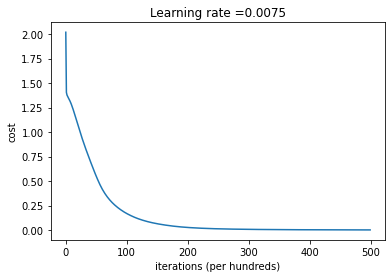

In [621]:
# GRADED CODE: hyperparameter tuning
# suggestion: 4-5 layers, layer node < 1000, learning rate < 0.01, iterations > 2500
if bonus:
    ### START CODE HERE ### (≈ 2 lines of code) (bon us)
    layers_dims = [64, 64, 32, 8, 4] #  e.g. [64, 1, 1, 1, 4]
    parameters = L_layer_model(X_bonus_train, y_bonus_train, layers_dims, learning_rate = 0.0075, num_iterations = 30000, print_cost = True, classes=4)
    ### END CODE HERE ###

In [622]:
if bonus:
    pred_train = predict(X_bonus_train, y_bonus_train, parameters, 4)

Accuracy: 1.0


In [623]:
#You can check for your validation accuracy here. (Optional)
if bonus:
### START CODE HERE ###
    pred_train = predict(X_bonus_val, y_bonus_val, parameters, 4)
### END CODE HERE ###

Accuracy: 0.8761742100768574


In [604]:
if bonus:
    pred_test = predict(X_test, None, parameters, 4)
    output["bonus_pred_test"] = pred_test
else:
    output["bonus_pred_test"] = None

# Submit prediction

In [605]:
# sanity check
assert(list(output.keys()) == ['initialize_parameters', 'initialize_parameters_deep', 'linear_forward', 'sigmoid', 'relu', 'softmax', 'linear_activation_forward_sigmoid', 'linear_activation_forward_relu', 'linear_activation_forward_softmax', 'compute_BCE_cost', 'compute_CCE_cost', 'linear_backward', 'sigmoid_backward', 'relu_backward', 'softmax_CCE_backward', 'linear_activation_backward_sigmoid', 'linear_activation_backward_relu', 'update_parameters', 'basic_pred_val', 'bonus_pred_test'])

In [613]:
### START CODE HERE ### (≈ 2 lines of code)
student_id = 108062313
np.save(str(student_id) + "_output.npy", output)
### END CODE HERE ###

In [611]:
# sanity check
submit = np.load(str(student_id) + "_output.npy", allow_pickle=True).item()
for key, value in submit.items():
    print(str(key) + "： " + str(type(value)))

initialize_parameters： <class 'dict'>
initialize_parameters_deep： <class 'dict'>
linear_forward： <class 'tuple'>
sigmoid： <class 'tuple'>
relu： <class 'tuple'>
softmax： <class 'tuple'>
linear_activation_forward_sigmoid： <class 'tuple'>
linear_activation_forward_relu： <class 'tuple'>
linear_activation_forward_softmax： <class 'tuple'>
compute_BCE_cost： <class 'numpy.ndarray'>
compute_CCE_cost： <class 'numpy.ndarray'>
linear_backward： <class 'tuple'>
sigmoid_backward： <class 'numpy.ndarray'>
relu_backward： <class 'numpy.ndarray'>
softmax_CCE_backward： <class 'numpy.ndarray'>
linear_activation_backward_sigmoid： <class 'tuple'>
linear_activation_backward_relu： <class 'tuple'>
update_parameters： <class 'dict'>
basic_pred_val： <class 'numpy.ndarray'>
bonus_pred_test： <class 'numpy.ndarray'>


Expected output: (without bonus) <br>
<small>
initialize_parameters： <class 'dict'> <br>
initialize_parameters_deep： <class 'dict'> <br>
linear_forward： <class 'tuple'> <br>
sigmoid： <class 'tuple'> <br>
relu： <class 'tuple'> <br>
softmax： <class 'NoneType'> <br>
linear_activation_forward_sigmoid： <class 'tuple'> <br>
linear_activation_forward_relu： <class 'tuple'> <br>
linear_activation_forward_softmax： <class 'NoneType'> <br>
compute_BCE_cost： <class 'numpy.ndarray'> <br>
compute_CCE_cost： <class 'NoneType'> <br>
linear_backward： <class 'tuple'> <br>
sigmoid_backward： <class 'numpy.ndarray'> <br>
relu_backward： <class 'numpy.ndarray'> <br>
softmax_CCE_backward： <class 'NoneType'> <br>
linear_activation_backward_sigmoid： <class 'tuple'> <br>
linear_activation_backward_relu： <class 'tuple'> <br>
update_parameters： <class 'dict'> <br>
basic_pred_val： <class 'numpy.ndarray'> <br>
bonus_pred_test： <class 'NoneType'> <br>
</small>

Expected output: (with bonus)<br>
<small>
initialize_parameters： <class 'dict'> <br>
initialize_parameters_deep： <class 'dict'> <br>
linear_forward： <class 'tuple'> <br>
sigmoid： <class 'tuple'> <br>
relu： <class 'tuple'> <br>
softmax： <class 'tuple'> <br>
linear_activation_forward_sigmoid： <class 'tuple'> <br>
linear_activation_forward_relu： <class 'tuple'> <br>
linear_activation_forward_softmax： <class 'tuple'> <br>
compute_BCE_cost： <class 'numpy.ndarray'> <br>
compute_CCE_cost： <class 'numpy.ndarray'> <br>
linear_backward： <class 'tuple'> <br>
sigmoid_backward： <class 'numpy.ndarray'> <br>
relu_backward： <class 'numpy.ndarray'> <br>
softmax_CCE_backward： <class 'numpy.ndarray'> <br>
linear_activation_backward_sigmoid： <class 'tuple'> <br>
linear_activation_backward_relu： <class 'tuple'> <br>
update_parameters： <class 'dict'> <br>
basic_pred_val： <class 'numpy.ndarray'> <br>
bonus_pred_test： <class 'numpy.ndarray'>
</small>